# 实验2 直方图均衡化

## 一、导入图片

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Text(0.5, 1.0, 'yewan')

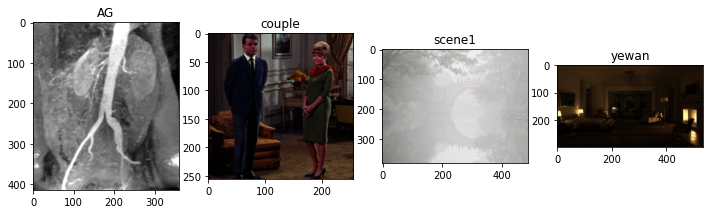

In [2]:
path = './Images//Lab2//'

AG     = plt.imread(path+'AG.jpg')
couple = plt.imread(path+'couple.bmp')
scene1 = plt.imread(path+'scene1.jpg')
yewan  = plt.imread(path+'yewan.jpg')

plt.rcParams['figure.figsize'] = (12.0, 7.0) 
plt.subplot(2,4,1)
plt.imshow(AG, 'gray')
plt.title('AG')
plt.subplot(2,4,2)
plt.imshow(couple)
plt.title('couple')
plt.subplot(2,4,3)
plt.imshow(scene1)
plt.title('scene1')
plt.subplot(2,4,4)
plt.imshow(yewan)
plt.title('yewan')

## 二、方法类编写

In [3]:
# 定义直方图类
class Histogram:
    def __init__(self, image):
        self.image  = image
        self.isGray = len(image.shape)==2
        self.height = image.shape[0]
        self.width  = image.shape[1]
        self.channels_num = 1 if self.isGray else image.shape[2]

    def __myhist(self, image):
        # 计算图像直方图，image为对象图像或对象均衡化后图像
        if(len(image.shape)==2):
            hist = np.zeros([1, 256])
            max_num = np.max(image)
            min_num = np.min(image)
            for i in range(min_num, max_num+1):
                hist[0, i] = np.sum(image==i)
            assert np.sum(hist)==self.height*self.width
            return hist
        else:
            hist = np.zeros([self.channels_num, 256])
            for ch in range(self.channels_num): 
                hist[ch,:] = self.__myhist(image[:,:,ch])
        return hist

    def plotHist(self, title, HisEq=0):
        # 绘制直方图，HisEq为1可视化均衡化后图像的直方图
        if(HisEq==1):
            hist = self.__myhist(self.img_eq)
        elif(HisEq==2):
            hist = self.__myhist(self.img_from_hsv)
        elif(HisEq==3):
            hist = self.__myhist(self.img_hsv)
        else:
            hist = self.__myhist(self.image)
        for i in range(self.channels_num):
            if(self.channels_num>1):
                plt.subplot(1, self.channels_num, i+1)
                plt.title("channel"+str(i+1))
                plt.suptitle(title)
            else:
                plt.title(title)
            plt.bar(range(0,256), hist[i])

    def __HisEq(self, image):
        # 对输入image进行直方图均衡化，其中image为self.image的某个通道
        hist = self.__myhist(image)
        probs = np.cumsum(hist[0])/(self.width*self.height)
        img_map = [int(255 * probs[i]+0.5) for i in range(256)]
        img = np.zeros(image.shape, dtype=np.uint8)
        for i in range(self.height):
            for j in range(self.width):
                img[i, j] = img_map[image[i, j]]
        return img

    def HisEq(self, visualization=1, HSV=0):
        # 对self.image进行直方图均衡化,visualization=1时可视化均衡化后的图像
        # HSV=0时各个通道单独均衡化、HSV=1时将彩色图像转到HSV域, 然后使用V进行直方图均衡化。
        if self.isGray:
            if(visualization):
                plt.imshow(self.__HisEq(self.image), 'gray')
            self.img_eq = self.__HisEq(self.image)
            return self.__HisEq(self.image)
        elif(HSV):
            img_hsv = cv2.cvtColor(self.image, cv2.COLOR_RGB2HSV)
            img_hsv[:,:,2] = self.__HisEq(img_hsv[:,:,2])
            img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
            self.img_from_hsv = img
            self.img_hsv = img_hsv
        else:
            img = np.zeros(self.image.shape, dtype=np.uint8)
            for i in range(self.channels_num):
                img[:,:,i] = self.__HisEq(self.image[:,:,i])
            self.img_eq = img

        if(visualization):
            plt.imshow(img)
        return img


## 三、直方图

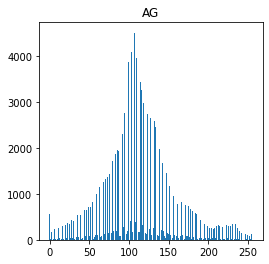

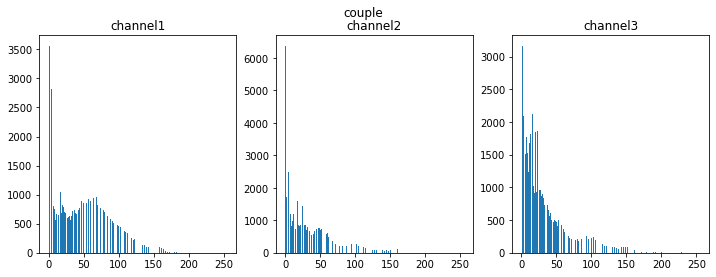

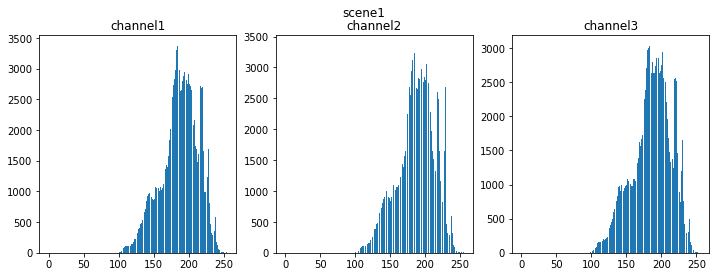

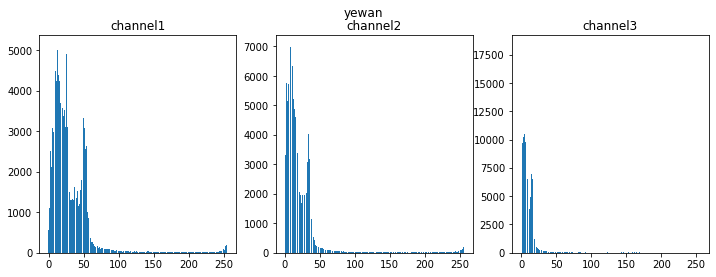

In [4]:
AG_h = Histogram(AG)
couple_h = Histogram(couple)
scene1_h = Histogram(scene1)
yewan_h = Histogram(yewan)

plt.figure(figsize=(4,4))
AG_h.plotHist('AG')
plt.figure(figsize=(12,4))
couple_h.plotHist('couple')
plt.figure(figsize=(12,4))
scene1_h.plotHist('scene1')
plt.figure(figsize=(12,4))
yewan_h.plotHist('yewan')

可以看到个图像各通道的灰度值分布不均匀，且集中在很小的范围内，对比度不够，导致图像很多细节人眼辨别不出来。

## 四、均衡化

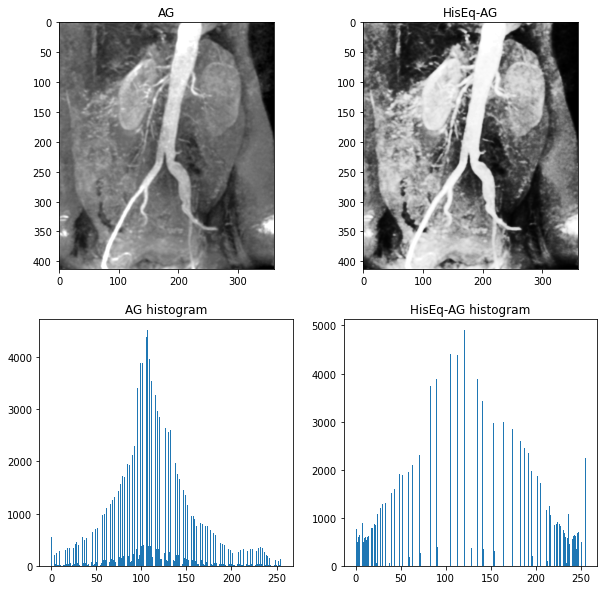

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(AG, 'gray')
plt.title('AG')
plt.subplot(2,2,2)
AG_h.HisEq()
plt.title('HisEq-AG')
plt.subplot(2,2,3)
AG_h.plotHist('AG histogram')
plt.subplot(2,2,4)
AG_h.plotHist('HisEq-AG histogram', 1)

从图像上来看，图像的对比度增强---原图黑色部分更黑，白色部分更白，前景目标更为突出。

从直方图来看，原本灰度相对集中，均衡化后直方图的灰度被分散到更为广阔的灰度范围中去。

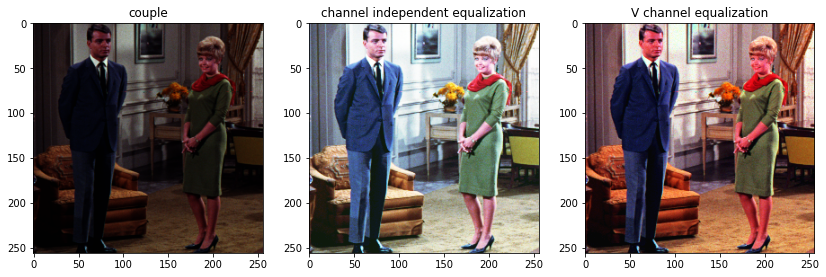

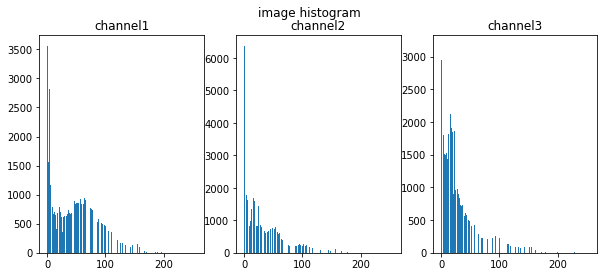

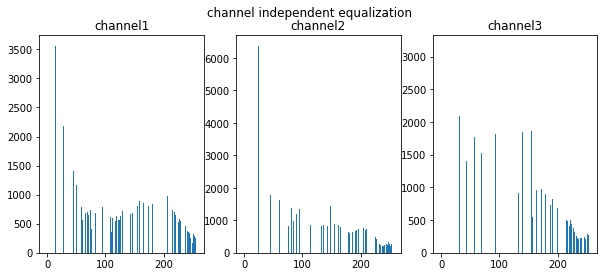

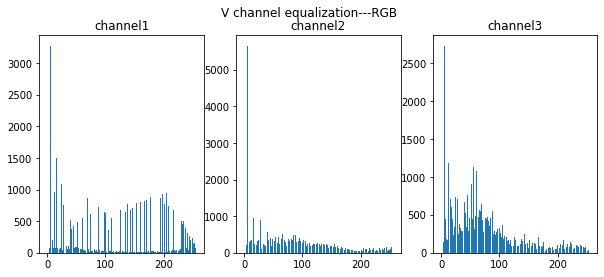

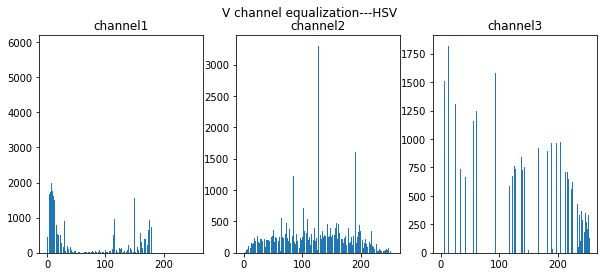

In [6]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.imshow(couple)
plt.title('couple')
plt.subplot(1,3,2)
couple_h.HisEq()
plt.title('channel independent equalization')
plt.subplot(1,3,3)
couple_h.HisEq(HSV=1)
plt.title('V channel equalization')

plt.figure(figsize=(10,4))
couple_h.plotHist('image histogram')
plt.figure(figsize=(10,4))
couple_h.plotHist('channel independent equalization', 1)
plt.figure(figsize=(10,4))
couple_h.plotHist('V channel equalization---RGB', 2)
plt.figure(figsize=(10,4))
couple_h.plotHist('V channel equalization---HSV', 3)

可以看到单独对每一个通道进行灰度化后，每个通道的直方图都将灰度值分散开来，朝着均匀分布近似，对比度明显增强，并且原图像也不再是暗色调，各种隐藏在黑暗中的细节都能被肉眼清晰地看到。
但是由于RGB通道做了不同的变换，导致变换后的图像色调信息(H)丢失。

可以看到，通过调整HSV域中V通道（明度），这样既能保持原图像的色调和饱和度信息，又能够单独地对明度进行调整，使得图像的明暗对比度增强。

通过结果可以看到变换后的图像同样能够看到隐藏的细节，同时色调没有发生丢失。同时其HSV域的V通道的直方图也朝均匀分布近似，而H、S、R、G、B并没有这个变化倾向。

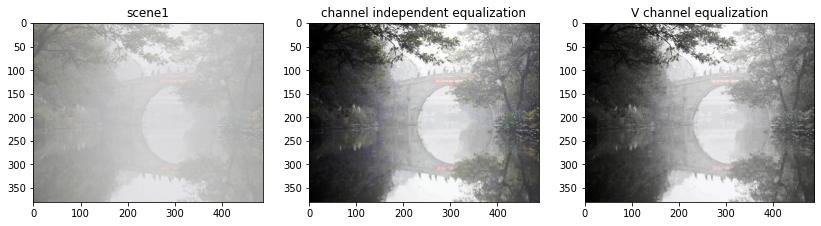

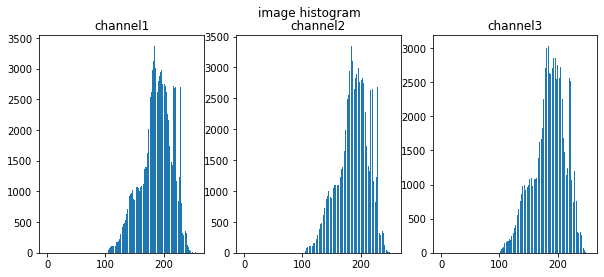

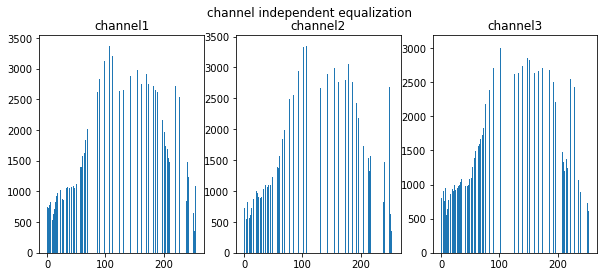

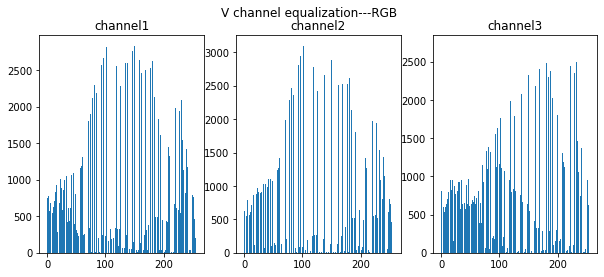

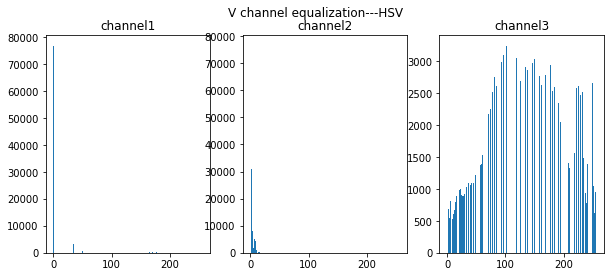

In [7]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.imshow(scene1)
plt.title('scene1')
plt.subplot(1,3,2)
scene1_h.HisEq()
plt.title('channel independent equalization')
plt.subplot(1,3,3)
scene1_h.HisEq(HSV=1)
plt.title('V channel equalization')

plt.figure(figsize=(10,4))
scene1_h.plotHist('image histogram')
plt.figure(figsize=(10,4))
scene1_h.plotHist('channel independent equalization', 1)
plt.figure(figsize=(10,4))
scene1_h.plotHist('V channel equalization---RGB', 2)
plt.figure(figsize=(10,4))
scene1_h.plotHist('V channel equalization---HSV', 3)

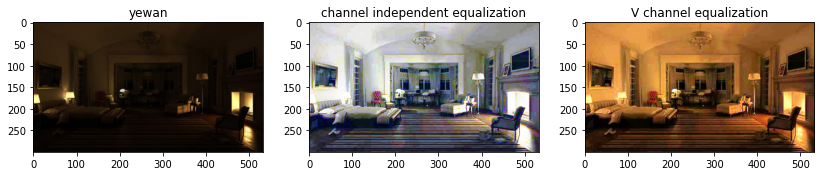

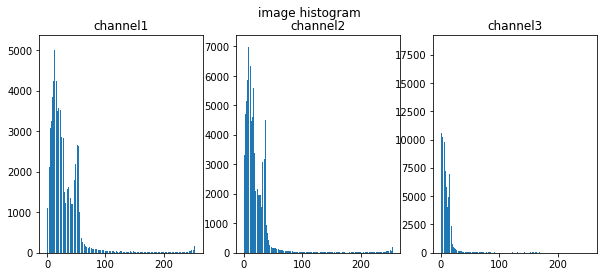

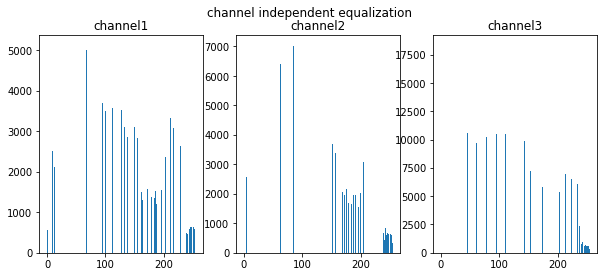

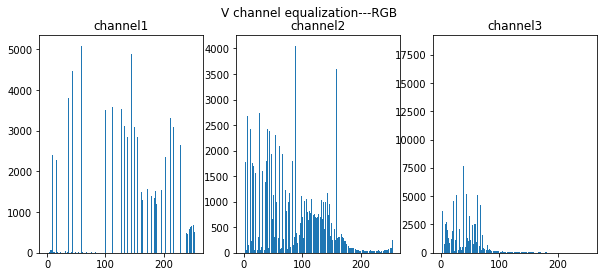

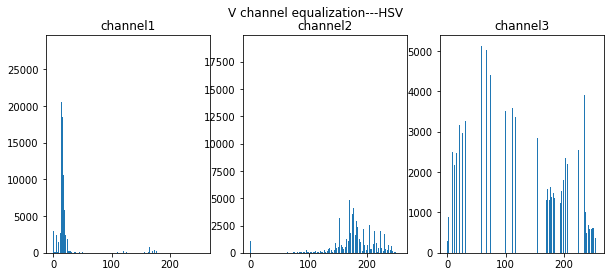

In [8]:
plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.imshow(yewan)
plt.title('yewan')
plt.subplot(1,3,2)
yewan_h.HisEq()
plt.title('channel independent equalization')
plt.subplot(1,3,3)
yewan_h.HisEq(HSV=1)
plt.title('V channel equalization')

plt.figure(figsize=(10,4))
yewan_h.plotHist('image histogram')
plt.figure(figsize=(10,4))
yewan_h.plotHist('channel independent equalization', 1)
plt.figure(figsize=(10,4))
yewan_h.plotHist('V channel equalization---RGB', 2)
plt.figure(figsize=(10,4))
yewan_h.plotHist('V channel equalization---HSV', 3)


可以看到，所有图片在直方图均衡化后，直方图的分布范围变广，图片的对比度增强，许多隐藏在图片中的细节都呈现在肉眼前。